In [ ]:
#previously we convolved over the possible mus, now we want to do it over sigma and mu

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import time
from scipy.stats import laplace, norm
from scipy.optimize import curve_fit
#from scipy.stats import norm
%matplotlib inline

In [15]:
#it just so happens that all systems are valid, once we've filtered out systems under 8 = log_10(time)
#take the first two instability times for each
data = pd.read_csv("../../csvs/Res_3_feats/Convolved_Params_68_IOU.csv")
data.head()

,ID,Norm,Mean,Mean_Error,Sigma,Error,IOU
0,0.0,17.579000,3.761504,0.001761,0.541129,0.001761,0.980213
1,3.0,23.465416,6.822150,0.001102,0.454880,0.001102,0.985415
2,4.0,88.045595,5.622223,0.004265,0.302330,0.004265,0.915517
3,5.0,12.440545,5.750126,0.002811,0.663568,0.002811,0.974146
4,7.0,30.160825,3.736249,0.001863,0.427685,0.001863,0.973419


In [16]:
data["ID"].values

array([  0.,   3.,   4.,   5.,   7.,   8.,  10.,  11.,  13.,  14.,  15.,
        16.,  19.,  20.,  22.,  23.,  25.,  26.,  27.,  28.,  30.,  31.,
        33.,  34.,  36.,  37.,  38.,  41.,  42.,  43.,  46.,  47.,  48.,
        49.,  50.,  53.,  54.,  55.,  58.,  59.,  60.,  61.,  62.,  63.,
        65.,  66.,  67.,  69.,  70.,  71.,  73.,  75.,  77.,  80.,  81.,
        83.,  84.,  88.,  89.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        99., 100.])

In [19]:
np.random.seed(0)
file_path = "../../csvs/Res_3_feats/"

#the delta times
delta_times = np.zeros((data.shape[0],2))

for jj, planet_sys in enumerate(data["ID"].values):
    try:
        times =pd.read_csv(file_path+"/Res_sys_{0}_500.csv".format(int(planet_sys)), index_col = 0)
    except:
        times =pd.read_csv(file_path+"/Res_sys_{0}_1000.csv".format(int(planet_sys)), index_col = 0)
    #print(times["t"].values[:2])
    delta_times[jj, :] = times["t"].values[:2]
print(delta_times)

[[5.33062797e+03 9.37784115e+03]
 [5.94688669e+06 3.94129848e+06]
 [3.71138137e+05 6.34577233e+05]
 [5.82849813e+05 1.77712109e+06]
 [2.92532765e+03 7.61855822e+03]
 [6.25086156e+05 2.30552945e+06]
 [1.29513143e+07 6.61036758e+05]
 [3.09566341e+07 1.57564538e+07]
 [1.86066586e+04 3.92171266e+04]
 [1.14464580e+05 3.02033962e+04]
 [1.51702195e+06 2.40342434e+05]
 [1.91597048e+07 3.20922431e+06]
 [1.16453379e+05 7.53157725e+05]
 [8.39169555e+04 6.01333360e+03]
 [1.42035907e+06 3.65055436e+06]
 [5.02838884e+05 3.34182628e+05]
 [7.49287899e+05 4.17159366e+05]
 [3.75707827e+05 4.52299687e+04]
 [5.30496187e+05 1.64167184e+05]
 [1.52375592e+05 2.36856187e+04]
 [9.27169855e+05 7.22605773e+05]
 [2.78260132e+06 8.54850490e+06]
 [4.64944955e+04 2.60279032e+05]
 [2.86323916e+04 1.21871348e+05]
 [4.62854001e+05 1.97730546e+04]
 [5.04133056e+04 7.35215835e+04]
 [8.96964618e+04 4.48296122e+04]
 [6.99345837e+05 3.25999430e+05]
 [5.30501235e+04 4.45427424e+04]
 [7.52869425e+04 3.33298592e+05]
 [3.456459

In [20]:
deltatimes=pd.DataFrame(delta_times, columns=["t", "t_shadow"])

In [21]:
valid_delta_times = deltatimes[(deltatimes["t"]>1e4) 
        & (deltatimes["t"]<1e7) & (deltatimes["t_shadow"]>1e4)
        & (deltatimes["t_shadow"]<1e7)]
print valid_delta_times.shape
#print prob_sig[:10]
#print prob_sig.sum()


(53, 2)


(68, 7)
Average Sigma 0.5722791554969378 Std in Sigma 0.2395581511072143
(68, 7)
[0.00156359 0.00183285 0.00213873 0.00248431 0.00287264 0.00330658
 0.00378879 0.00432161 0.00490698 0.00554633]
[0.         0.01616162 0.03232323 0.04848485 0.06464646 0.08080808
 0.0969697  0.11313131 0.12929293 0.14545455]


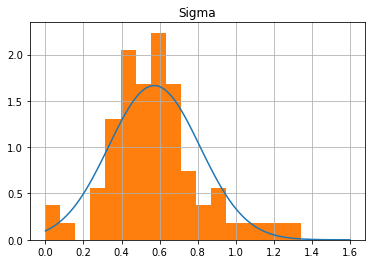

In [23]:
valid_info_frame= pd.read_csv("../../csvs/Res_3_feats/Convolved_Params_68_IOU.csv")
print valid_info_frame.shape
valid_info_frame["Sigma"] = np.abs(valid_info_frame["Sigma"])
bins = np.linspace(0, 1.5, 20)

mu_fit, sig_fit =  norm.fit(valid_info_frame["Sigma"].values)
print "Average Sigma", mu_fit, "Std in Sigma", sig_fit
#x, xmax = plt.xlim()
fig = plt.figure()
ax = fig.add_subplot("111")
x = np.linspace(0, 1.6, 100)
prob_sig = norm.pdf(x, mu_fit, sig_fit)
plt.plot(x, prob_sig)
valid_info_frame.hist("Sigma", normed = 1, ax = ax, bins = bins)
print valid_info_frame.shape


norm_prob_sig = prob_sig/(prob_sig.sum())
print norm_prob_sig[:10]
print x[:10]


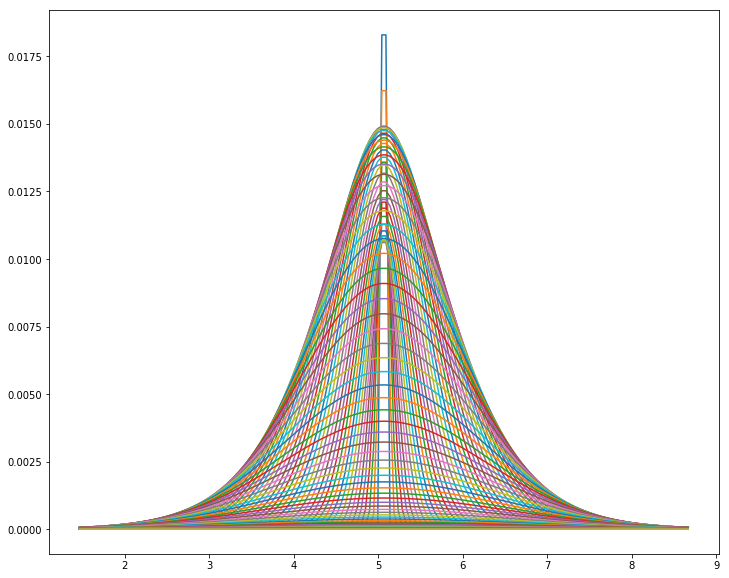

In [24]:
#Analytically over each of the mu;s, how to combine the sigmas?
#try with the first 100
trial = 10 #how many to test it with
max_sigma = 0.6 #the center, used to define bins
increments = 150 # how fine does the convoltion have to be?
#bins = np.linspace(0, 1.5, 20)

plt.figure(figsize=(12, 10))
#x is whawt stores the bins values (sigma values)
#prob_sig stpres the corresponding probability of that sigma
for i in range(7, trial,1):
    total_y= np.zeros(increments)
    for j in range(1,int(prob_sig.shape[0]), 1):
        fixed_sigma=x[j]
        t_sim = np.log10(valid_delta_times["t"].values[i])
        bins = np.linspace(t_sim -6*max_sigma, t_sim +6*max_sigma, increments)

        #print t_sim
        #p = p*prob*norm_prob_sig[j]

        final_y = norm.pdf(bins, t_sim, fixed_sigma*2**0.5)* norm_prob_sig[j]
        
        total_y +=final_y
        
        plt.plot(bins, final_y )
    break
plt.show()


This graph is the summation of all the gaussians for ONE SYSTEM

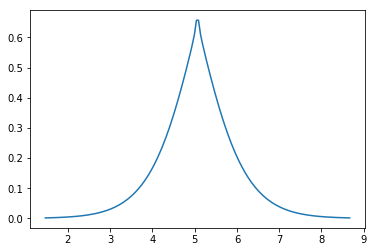

In [27]:
bins = np.linspace(t_sim -6*max_sigma, t_sim +6*max_sigma, increments)
plt.plot(bins, total_y)
width = (12*max_sigma)/(increments-1)
#print  width, bins[1] - bins[0]
#center, spread =laplace.fit(total_y)
#rv =laplace(loc = center, scale = spread)
#loc should be zero, since this should be symmetric about t = 0
# plt.plot(bins, rv.pdf(bins))
# NEed to do a least sqaures fit of a laplaec fit to this data

The laplace distribution has a mean of $\mu$, and a varience of $2b^2$.  P(x) = $\frac{1}{2b}exp(\frac{-|x-\mu|}{b})$

In [28]:
def laplace_fit(data, mean, spread):
    #data is your data
    #mean spread are the params you try to fit to the data
    return np.exp(-np.abs(data-mean)/spread)/2./spread

Fit a Laplace distribution to this

[5.0661521 0.7136294]
[0.00313179 0.00443768]


(0, 0.7)

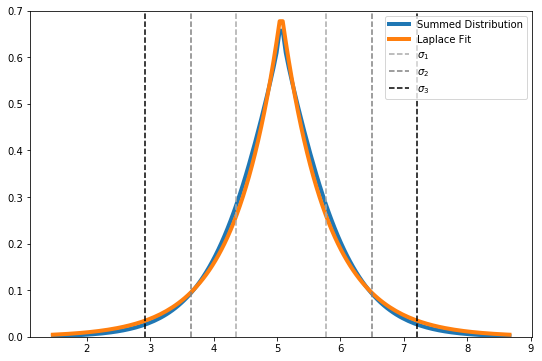

In [30]:
#function for optimizing the difference between total_Y(graph from)
#use the same x values,
plt.figure (figsize=(9, 6))
popt, pcov = curve_fit(laplace_fit, bins, total_y)
print popt
perr = np.sqrt(np.diag(pcov))
print perr
plt.plot(bins, total_y, label = "Summed Distribution", linewidth = 4)
plt.plot(bins, laplace_fit(bins, *popt), label = "Laplace Fit", linewidth = 4)
#plt.legend()
colors = ["darkgrey","grey", "black"]
for i in range(1,4):
    plt.axvline(popt[0]+i*popt[1], ls= "dashed", label = "$\sigma_{0}$".format(i), color = colors[i-1])
    plt.axvline(popt[0]-i*popt[1], ls= "dashed", color = colors[i-1])
plt.legend()
plt.ylim([0,0.7])

(array([ 1.,  1.,  9., 12., 16., 13.,  6.,  6.,  1.,  3.]),
 array([-0.06935428, -0.05453605, -0.03971783, -0.0248996 , -0.01008138,
         0.00473685,  0.01955507,  0.0343733 ,  0.04919152,  0.06400975,
         0.07882797]),
 <a list of 10 Patch objects>)

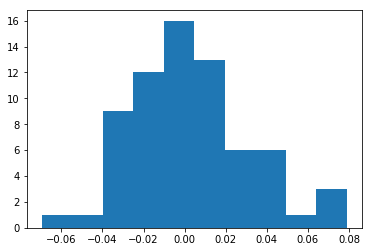

In [35]:
#how is the distribution of the difference in instability times?
deltatimes = np.log10(deltatimes)
diff = deltatimes["t"] - deltatimes["t_shadow"]
plt.hist(diff, bins = 10)

0.0005661819617272764
0.022354377058654895


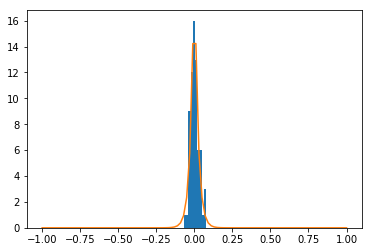

In [39]:
#print len(np.where(reduced_systems==-np.inf)[0])
#print np.where(reduced_systems ==-np.inf)
#print reduced_systems["diff"].min()
#print reduced_systems["diff"].max()
bins = np.linspace(-1,1,100)

plt.hist(diff, bins = 10)

fit1, fit2 =laplace.fit(diff)
print fit1
print fit2
#plot with it actually centered at zero
#, as any other value should be just due to noise
#if this was not the case, it would mean one end of the 
#distribution is  more prefered
rv =laplace(loc = 0, scale = fit2)
#loc should be zero, since this should be symmetric about t = 0
plt.plot(bins, rv.pdf(bins))
